<a href="https://colab.research.google.com/github/AkashBabu1712/Data-Science-Learning/blob/main/Scipy_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**What is scipy?**

* SciPy is a free and open-source Python library used for scientific computing and technical computing.

* It is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python.

* It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data.

In [ ]:
#installation of Scipy
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing Libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy
from scipy.cluster.vq import  kmeans, whiten
from scipy.constants import find

###**Sub packages in SciPy**

**Sr.	Sub-Package	Description :**

1.	**scipy.cluster**	Cluster algorithms are used to vector quantization/ Kmeans.
2.	**scipy.constants**	It represents physical and mathematical constants.
3.	**scipy.fftpack**	It is used for Fourier transform.
4.	**scipy.integrate**	Integration routines
5.	**scipy.interpolation**	Interpolation
6.	**scipy.linalg**	It is used for linear algebra routine.
7.	**scipy.io**	It is used for data input and output.
8.	**scipy.ndimage**	It is used for the n-dimension image.
9.	**scipy.odr**	Orthogonal distance regression.
10.	**scipy.optimize**	It is used for optimization.
11.	**scipy.signal**	It is used in signal processing.
12.	**scipy.sparse**	Sparse matrices and associated routines.
13.	**scipy.spatial**	Spatial data structures and algorithms.
14.	**scipy.special**	Special Function.
15.	**scipy.stats**	Statistics.
16.	**scipy.weaves**	It is a tool for writing.

**SciPy Cluster**

*Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. Each group which is formed from clustering is known as a cluster.*

**Types of clustering :**

* Central
* Hierarchy

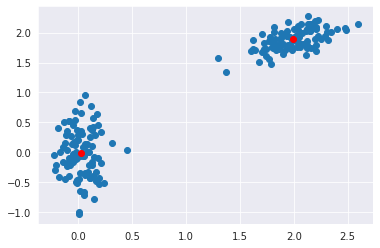

In [ ]:
sns.set_style("darkgrid")
# Create 50 datapoints in two clusters a and b
pts = 100
a = np.random.multivariate_normal([0, 0],
                                  [[4, 1], [1, 4]],
                                  size=pts)
b = np.random.multivariate_normal([30, 10],
                                  [[10, 2], [2, 1]],
                                  size=pts)
features = np.concatenate((a, b))

# Whiten data
whitened = whiten(features)

# Find 2 clusters in the data
codebook, distortion = kmeans(whitened, 2)

# Plot whitened data and cluster centers in red
plt.scatter(whitened[:, 0], whitened[:, 1])
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

**SciPy constants**

*There are a variety of constants that are included in the scipy.constant sub-package.These constants are used in the general scientific area.*

In [ ]:
#Import golden constant from the scipy
print("sciPy -golden ratio  Value = %.18f"%scipy.constants.golden)

sciPy -golden ratio  Value = 1.618033988749894903


In [ ]:
find('boltzmann')

['Boltzmann constant',
 'Boltzmann constant in Hz/K',
 'Boltzmann constant in eV/K',
 'Boltzmann constant in inverse meter per kelvin',
 'Stefan-Boltzmann constant']

In [ ]:
scipy.constants.physical_constants['Boltzmann constant in Hz/K']

(20836619120.0, 'Hz K^-1', 0.0)

**SciPy FFTpack**

*The FFT stands for Fast Fourier Transformation which is an algorithm for computing DFT. DFT is a mathematical technique which is used in converting spatial data into frequency data.*


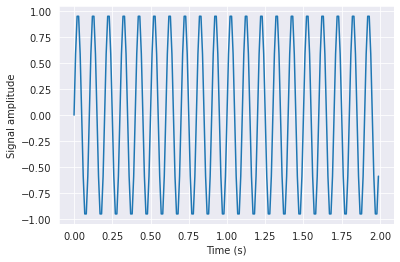

In [ ]:
sns.set_style("darkgrid")
#Frequency in terms of Hertz
fre  = 10
#Sample rate
fre_samp = 100
t = np.linspace(0, 2, 2 * fre_samp, endpoint = False )
a = np.sin(fre  * 2 * np.pi * t)
plt.plot(t, a)
plt.xlabel('Time (s)')
plt.ylabel('Signal amplitude')
plt.show()

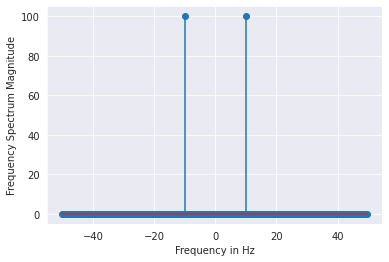

In [ ]:
from scipy import fftpack
A = fftpack.fft(a)
frequency = fftpack.fftfreq(len(a)) * fre_samp
plt.stem(frequency, np.abs(A),use_line_collection=True)
plt.xlabel('Frequency in Hz')
plt.ylabel('Frequency Spectrum Magnitude')
plt.show()

**SciPy integrate**

*The integrate sub package of the Scipy package contains a lot of functions that allow us to calculate the integral of some complex functions.*

**1. Single Integral**

*scipy.integrate.quad(f,a,b)*

f - Function to be integrated.

a-lower limit.

b- upper limit.

In [ ]:
from numpy import exp
f= lambda x:exp(-x**2)

In [ ]:
i = scipy.integrate.quad(f, 0, 1)
print(i)

(0.7468241328124271, 8.291413475940725e-15)


In [ ]:
#Multiple Integrals
from math import sqrt
f = lambda x, y : 2*x*y
g = lambda x : 0
h = lambda y : 4*y**2
i = scipy.integrate.dblquad(f, 0, 0.5, g, h)
print(i)

(0.04166666666666667, 5.491107323698757e-15)


**SciPy Interpolation**

* Interpolation is the process of estimating unknown values that fall between known values.

* SciPy provides us with a sub-package scipy.interpolation which makes this task easy for us.

* Using this package, we can perform 1-D or univariate interpolation and Multivariate interpolation.

* Multivariate interpolation (spatial interpolation ) is a kind interpolation on functions that consist of more than one variables.

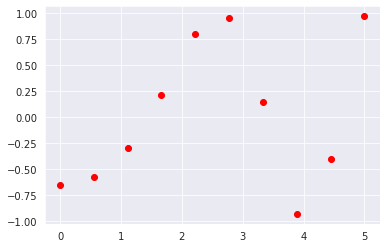

In [ ]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
x = np.linspace(0, 5, 10)
y = np.cos(x**2/3+4)
plt.scatter(x,y,c='r')
plt.show()

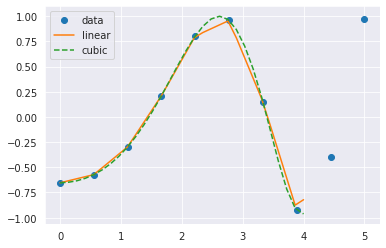

In [ ]:
from scipy.interpolate import interp1d

fun1 = interp1d(x, y,kind = 'linear')
fun2 = interp1d(x, y, kind = 'cubic')
#define a new set of input
xnew = np.linspace(0, 4,30)
plt.plot(x, y, 'o', xnew, fun1(xnew), '-', xnew, fun2(xnew), '--')
plt.legend(['data', 'linear', 'cubic','nearest'], loc = 'best')
plt.show()

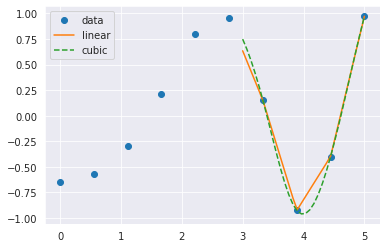

In [ ]:
fun1 = interp1d(x, y,kind = 'linear')
fun2 = interp1d(x, y, kind = 'cubic')
xnew = np.linspace(3, 5,30)
plt.plot(x, y, 'o', xnew, fun1(xnew), '-', xnew, fun2(xnew), '--')
plt.legend(['data', 'linear', 'cubic','nearest'], loc = 'best')
plt.show()

**SciPy linalg**

*SciPy has very fast linear algebra capabilities as it is built using the optimized ATLAS (Automatically Tuned Linear Algebra Software), LAPACK(Linear Algebra Package) and BLAS(Basic Linear Algebra Subprograms) libraries.*

**scipy.linalg.solve() to solve a linear equation**

*We are trying to solve a linear algebra system which can be given as*

        x + 2y - 3z = -3
        2x - 5y + 4z = 13  
        5x + 4y - z = 5

*We will find values of x,y and z for which all these equations are zero
Also finally we will check if the values are right by substituting them
in the equations.*

In [ ]:
from scipy import linalg

# Creating input array
a = np.array([[1, 2, -3], [2, -5, 4], [5, 4, -1]])
# Solution Array
b = np.array([[-3], [13], [5]])
# Solve the linear algebra
x = linalg.solve(a, b)
# Print results
print(x)
# Checking Results
print("\n Checking results,must be zeros")
print(a.dot(x) - b)

[[ 2.]
 [-1.]
 [ 1.]]

 Checking results,must be zeros
[[0.]
 [0.]
 [0.]]


In [ ]:
#Finding a determinant of a square matrix

#Declaring the numpy array
A = np.array([[1,2,9],[3,4,8],[7,8,4]])
#Passing the values to the det function
x = linalg.det(A)

#printing the result
print('Determinant of \n{} \n is {}'.format(A,x))

Determinant of 
[[1 2 9]
 [3 4 8]
 [7 8 4]] 
 is 3.999999999999986


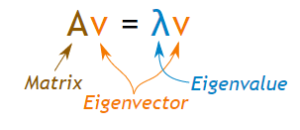

In [ ]:
#Eigenvalues and Eigenvectors

#Declaring the numpy array
A = np.array([[2,1,-2],[1,0,0],[0,1,0]])

#Passing the values to the eig function
values, vectors = linalg.eig(A)

#printing the result for eigenvalues
print(values)

#printing the result for eigenvectors
print(vectors)

[-1.+0.j  2.+0.j  1.+0.j]
[[-0.57735027 -0.87287156  0.57735027]
 [ 0.57735027 -0.43643578  0.57735027]
 [-0.57735027 -0.21821789  0.57735027]]


**SciPy IO (Input & Output)**

The functions provided by the scipy.io package enables us to work around with different formats of files such as:

* Matlab
* IDL
* Matrix Market
* Wave
* Arff
* Netcdf, etc.

*The functions such as loadmat(), savemat() and whosmat() can load a MATLAB file, save a MATLAB file and list variables in a MATLAB file respectively.*

In [ ]:
#save a MatLab file as test.mat which contains a structure as shown below:

#my_struct = struct('lon', 78, 'lat', 56)

In [ ]:
#use loadmat() function to import this file into a python script

from scipy.io import loadmat
#x = loadmat('test.mat')
#save the individual elements as python object
#lon = x['lon']
#lat = x['lat']
# one-liner to read a single variable
#lon = loadmat('test.mat')['lon']